# Advanced Operations, Detecting Faces and Features
>  After completing this chapter, you will have a deeper knowledge of image processing as you will be able to detect edges, corners, and even faces! You will learn how to detect not just front faces but also face profiles, cat, or dogs. You will apply your skills to more complex real-world applications. Learn to master several widely used image processing techniques with very few lines of code!

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Image Processing in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

In [3]:
from skimage.io import imread
from skimage import color, data

## Finding the edges with Canny

### Edges

<div class=""><p>In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.</p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/c043d452dc01e6b6ce647e5f31afb20283879f22/toronjas.jpg" width="20%" alt="Grapefruits">
</center>
<center>Image preloaded as <code>grapefruit</code>.</center><p></p>
<p>The <code>color</code> module has already been preloaded for you.</p></div>

In [2]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/grapefruit.jpg
grapefruit = plt.imread('grapefruit.jpg')

In [11]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

Instructions
<ul>
<li>Import the canny edge detector from the feature module.</li>
<li>Convert the image to grayscale, using the method from the color module used in previous chapters.</li>
<li>Apply the canny edge detector to the <code>grapefruit</code> image.</li>
</ul>

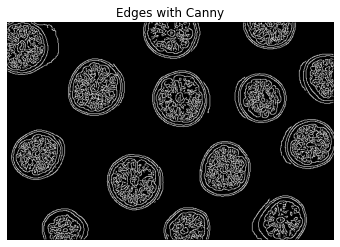

In [10]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

**You can see the shapes and details of the grapefruits of the original image being highlighted.**

### Less edgy

<div class=""><p>Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.</p>
<p>In this exercise, you'll experiment with sigma values of the <code>canny()</code> function.
</p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/c043d452dc01e6b6ce647e5f31afb20283879f22/toronjas.jpg" width="40%" alt="Grapefruits">
</center>
<center>Image preloaded as <code>grapefruit</code>.</center><p></p>
<p>The <code>show_image</code> has already been preloaded.</p></div>

Instructions 1/3
<p>Apply the canny edge detector to the <code>grapefruit</code> image with a sigma of <code>1.8</code>.</p>

In [15]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

Instructions 2/3
<p>Apply the canny edge detector to the <code>grapefruit</code> image with a sigma of <code>2.2</code>.</p>

In [13]:
# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, 2.2)

Instructions 3/3
<p>Show the resulting images.</p>

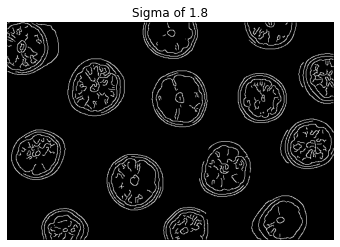

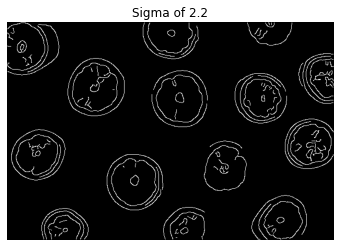

In [16]:
# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

**The bigger the sigma value, the less edges are detected because of the gaussian filter pre applied.**

## Right around the corner

### Perspective

<div class=""><p>In this exercise, you will detect the corners of a building using the Harris corner detector.</p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/4e1b6a178fd6d36488339a440959b4639cf54623/corners_building_top.jpg" width="20%" alt="Building from a bottom perspective">
</center>
<center>Image preloaded as <code>building_image</code>.</center><p></p>
<p>The functions <code>show_image()</code> and <code>show_image_with_corners()</code> have already been preloaded for you. As well as the <code>color</code> module for converting images to grayscale.</p></div>

In [19]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/building_image2.jpg
building_image = plt.imread('building_image2.jpg')

In [21]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

Instructions
<ul>
<li>Import the <code>corner_harris()</code> function from the feature module.</li>
<li>Convert the <code>building_image</code> to grayscale.</li>
<li>Apply the harris detector to obtain the measure response image with the possible corners.</li>
<li>Find the peaks of the corners.</li>
</ul>

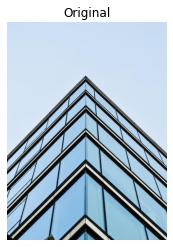

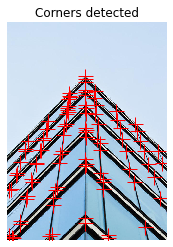

In [22]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

### Less corners

<div class=""><p>In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the <code>min_distance</code> attribute parameter of the <code>corner_peaks()</code> function.</p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/4e1b6a178fd6d36488339a440959b4639cf54623/corners_building_top.jpg" width="20%" alt="Building from a bottom perspective">
</center>
<center>Image preloaded as <code>building_image</code>.</center><p></p>
<p>The functions <code>show_image()</code>, <code>show_image_with_corners()</code> and required packages have already been preloaded for you. As well as all the previous code for finding the corners. The Harris measure response image obtained with <code>corner_harris()</code> is preloaded as <code>measure_image</code>.</p></div>

Instructions 1/3
<div class="exercise--instructions__content"><p>Find the peaks of the corners with a minimum distance of 2 pixels.</p></div>

In [23]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

With a min_distance set to 2, we detect a total 97 corners in the image.


Instructions 2/3
<p>Find the peaks of the corners with a minimum distance of 40 pixels.</p>

In [24]:
# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance set to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

With a min_distance set to 40, we detect a total 36 corners in the image.


Instructions 3/3
<p>Show original and resulting image with corners detected.</p>

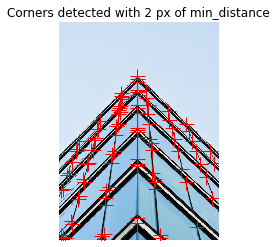

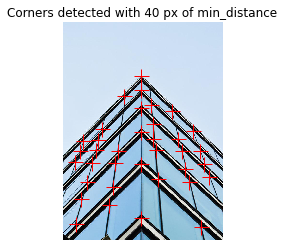

In [25]:
# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

**With a 40-pixel distance between the corners there are a lot less corners than with 2 pixels.**

## Face detection

### Is someone there?

<div class=""><p>In this exercise, you will check whether or not there is a person present in an image taken at night. </p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/5a23aa7fc1c16805a714b3e25f1b1fea5e55e324/face_det3.jpg" width="30%" alt="LAndscape of starry night with a young man in the left bottom corner">
</center>
<center>Image preloaded as <code>night_image</code>.</center><p></p>
<p>The <code>Cascade</code> of classifiers class from <code>feature</code> module has been already imported. The same is true for the <code>show_detected_face()</code> function, that is used to display the face marked in the image and crop so it can be shown separately.</p></div>

In [12]:
import matplotlib.patches as patches
from skimage.feature import Cascade

In [15]:
def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

In [17]:
def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

In [10]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/night_image.jpg
night_image = plt.imread('night_image.jpg')

Instructions
<ul>
<li>Load the trained file from the <code>data</code> module.</li>
<li>Initialize the detector cascade with the trained file.</li>
<li>Detect the faces in the image, setting the minimum size of the searching window to 10 pixels and 200 pixels for the maximum.</li>
</ul>

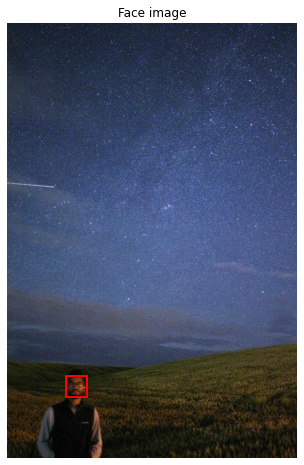

{'r': 772, 'c': 129, 'width': 46, 'height': 46}


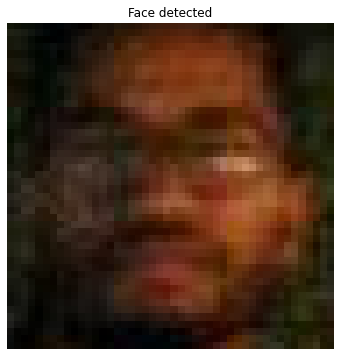

In [18]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

**The detector found the face even when it's very small and pixelated. Note though that you would ideally want a well-illuminated image for detecting faces.**

### Multiple faces

<div class=""><p>In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!</p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/de03c1148c09ffbeff54464d0846311cf1dd4da0/face_det_friends22.jpg" width="20%" alt="A group of 7 friends">
</center>
<center>Image preloaded as <code>friends_image</code>.</center><p></p>
<p>The <code>Cascade</code> of classifiers class from <code>feature</code> module has already been imported, as well as the <code>show_detected_face()</code> function which is used to display the face marked in the image and crop it so it can be shown separately.</p></div>

In [26]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/face_det_friends22.jpg
friends_image = plt.imread('face_det_friends22.jpg')

Instructions
<ul>
<li>Load the trained file <code>.lbp_frontal_face_cascade_filename()</code>. from the <code>data</code> module.</li>
<li>Initialize the detector cascade with trained file.</li>
<li>Detect the faces in the image, setting a <code>scale_factor</code> of 1.2 and <code>step_ratio</code> of 1.</li>
</ul>

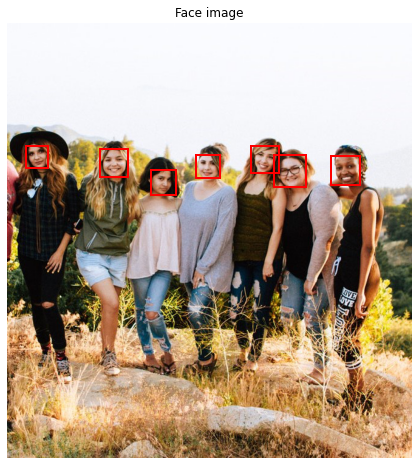

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


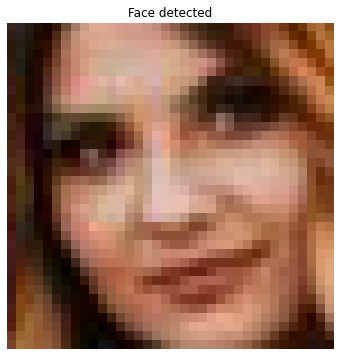

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


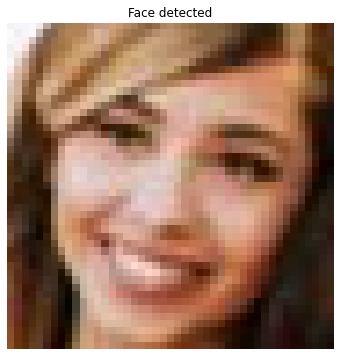

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


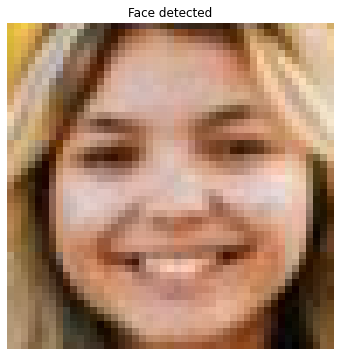

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


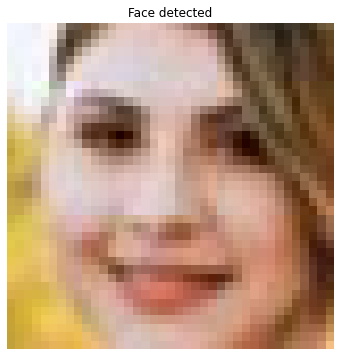

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


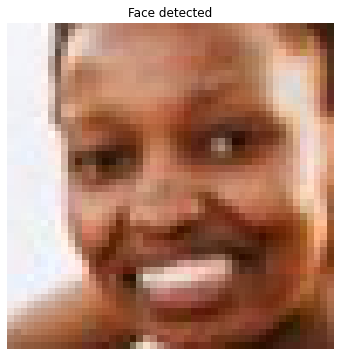

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


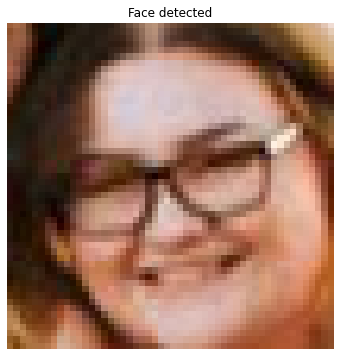

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


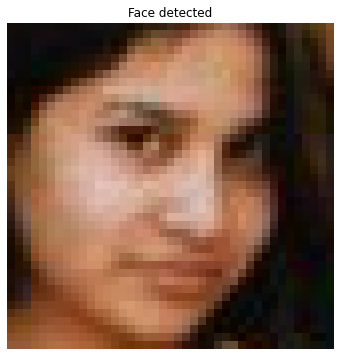

In [27]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

**The detector gave you a list with all the detected faces. Can you think about what you can use this for?**

### Segmentation and face detection

<div class=""><p>Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!</p>
<p>Using the <code>slic()</code> function for segmentation, pre-process the image before passing it to the face detector.
</p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/dfd1efd8ce38ebd4b7a3d176c6d51c58df2609f6/face_det9.jpg" width="15%" alt="Young woman selfie">
</center> 
<center>Image preloaded as <code>profile_image</code>.</center><p></p>
<p>The <code>Cascade</code> class, the <code>slic()</code> function from <code>segmentation</code> module, and the <code>show_detected_face()</code> function for visualization have already been imported. The detector is already initialized and ready to use as <code>detector</code>.</p></div>

In [30]:
from skimage.segmentation import slic

In [28]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/face_det9.jpg
profile_image = plt.imread('face_det9.jpg')

Instructions
<ul>
<li>Apply superpixel segmentation and obtain the segments a.k.a. <em>labels</em> using <code>slic()</code>.</li>
<li>Obtain the segmented image using <code>label2rgb()</code>, passing the <code>segments</code> and <code>profile_image</code>.</li>
<li>Detect the faces, using the detector with multi scale method.</li>
</ul>

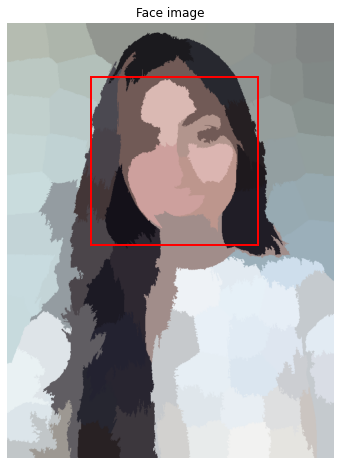

{'r': 110, 'c': 169, 'width': 340, 'height': 340}


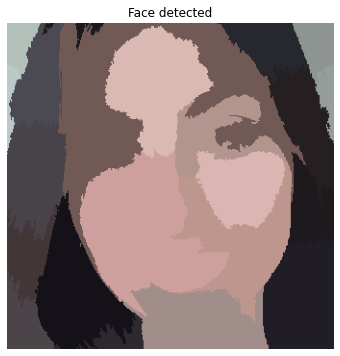

In [31]:
# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = color.label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

**You applied segementation to the image before passing it to the face detector and it's finding the face even when the image is relatively large.
This time you used 1000 by 1000 pixels as the maximum size of the searching window because the face in this case was indeed rather larger in comparison to the image.**

## Real-world applications

### Privacy protection

<div class=""><p>Let's look at a real-world application of what you have learned in the course. </p>
<p>In this exercise, you will detect <strong>human</strong> faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically. </p>
<p></p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/f531207e00d10992a3a02f87c7e488baba043209/face_det25.jpg" width="40%" alt="Group band walking">
</center> 
<center>Image preloaded as <code>group_image</code>.</center><p></p>
<p>You can use the gaussian filter for the blurriness.</p>
<p>The face detector is ready to use as <code>detector</code> and all packages needed have been imported.</p></div>

In [37]:
from skimage.filters import gaussian

In [54]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/face_det25.jpg
group_image = imread('face_det25.jpg')

In [55]:
def getFaceRectangle(d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= group_image[ x:width, y:height]
    return face

In [56]:
def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] =  gaussian_image
    return original

Instructions
<ul>
<li>Detect the faces in the image using the <code>detector</code>, set the minimum size of the searching window to 10 by 10 pixels.</li>
<li>Go through each detected face with a for loop.</li>
<li>Apply a gaussian filter to detect and blur faces, using a sigma of 8.</li>
</ul>

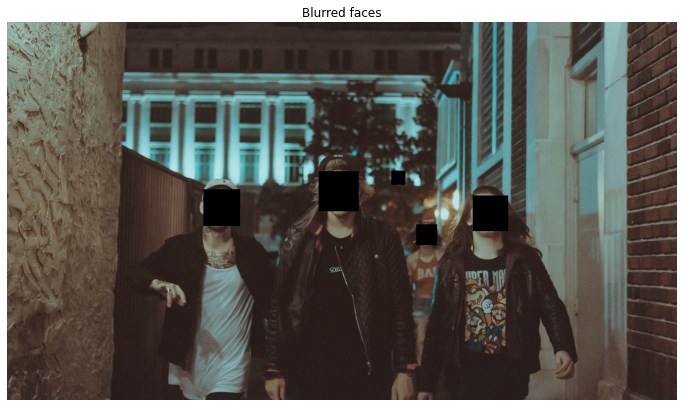

In [58]:
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face) 
show_image(resulting_image, "Blurred faces")

**You solved this important issue by applying what you have learned in the course.**

### Help Sally restore her graduation photo

<div class=""><p>You are going to combine all the knowledge you acquired throughout the course to complete a final challenge: reconstructing a very damaged photo.</p>
<p>Help Sally restore her favorite portrait which was damaged by noise, distortion, and missing information due to a breach in her laptop.
</p><center>
    <img src="https://assets.datacamp.com/production/repositories/4470/datasets/bb7a75247648a4aa81159eec6f3c35be28629a35/sally_damaged_image.jpg" width="30%" alt="Sally damaged picture">
</center> 
<center>Sally's damaged portrait is already loaded as <code>damaged_image</code>.</center><p></p>
<p>You will be fixing the problems of this image by:</p>
<ul>
<li>Rotating it to be uprightusing <code>rotate()</code></li>
<li>Applying noise reduction with <code>denoise_tv_chambolle()</code></li>
<li>Reconstructing the damaged parts with <code>inpaint_biharmonic()</code> from the <code>inpaint</code> module.</li>
</ul>
<p><code>show_image()</code> is already preloaded.</p></div>

In [67]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/18-image-processing-in-python/figures/sally_damaged_image.jpg
damaged_image = imread('sally_damaged_image.jpg')

In [62]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

Instructions
<ul>
<li>Import the necessary module to apply restoration on the image.</li>
<li>Rotate the image by calling the function <code>rotate()</code>.</li>
<li>Use the <em>chambolle</em> algorithm to remove the noise from the image.</li>
<li>With the mask provided, use the <em>biharmonic</em> method to restore the missing parts of the image and obtain the final image.</li>
</ul>

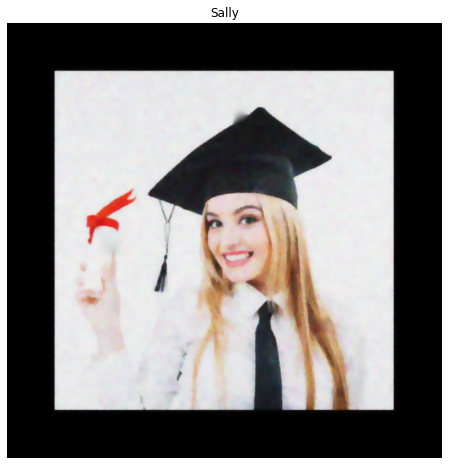

In [70]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)

show_image(result)